In [1]:
import os
from dotenv import load_dotenv

from typing import Literal
from IPython.display import display
from IPython.display import clear_output
import ipywidgets as widgets
import pandas as pd
from datetime import datetime
from plotly import graph_objects as go

from openbb import obb

In [2]:
# Load environment variables from .env file
load_dotenv()

True

In [3]:
openbb_token = os.getenv('OPENBB_TOKEN')

In [4]:
obb.account.login(pat=openbb_token)

# Verify that the credentials from Hub were loaded successfully.
obb.user.credentials

Credentials

benzinga_api_key: None
bls_api_key: None
cftc_app_token: None
econdb_api_key: None
fmp_api_key: **********
fred_api_key: None
intrinio_api_key: None
polygon_api_key: None
tiingo_token: None
tradingeconomics_api_key: None

In [5]:
# Set the output preference, if desired. The examples below use Pandas DataFrames.

obb.user.preferences.output_type = "dataframe"

In [6]:
# Get the price of a stock
symbol="AAPL"
quote_data = obb.equity.price.quote(symbol, provider="yfinance")
quote_data

,symbol,asset_type,name,exchange,bid,bid_size,ask,ask_size,last_price,open,...,low,volume,prev_close,year_high,year_low,ma_50d,ma_200d,volume_average,volume_average_10d,currency
0,AAPL,EQUITY,Apple Inc.,NMS,226.66,100,226.8,100,226.8,227.89,...,224.14,37076355,225.67,237.23,164.08,222.6748,197.95215,54048917.0,43267030.0,USD


In [7]:
# Get the price of a stock
symbol="^BVSP"
quote_data = obb.equity.price.quote(symbol, provider="yfinance")
quote_data

,symbol,asset_type,name,exchange,open,high,low,prev_close,year_high,year_low,ma_50d,ma_200d,volume_average,volume_average_10d,currency
0,^BVSP,INDEX,IBOVESPA,SAO,131671.52,131935.97,131156.34,131671.52,137469.0,112098.0,132758.81,128537.18,8683395.0,9523960.0,BRL


In [13]:
quote_data = obb.equity.price.historical("^BVSP", provider="yfinance")
df = pd.DataFrame(quote_data)
df.reset_index(inplace=True)
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'split_ratio',
       'dividend'],
      dtype='object')

In [7]:
symbol="AAPL"
options = obb.derivatives.options.chains(symbol, provider="yfinance")
options

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,last_trade_price,last_trade_time,bid,ask,change,change_percent,implied_volatility,in_the_money,currency
0,AAPL,226.415,AAPL241011C00100000,2024-10-11,6,100.0,call,1,3,126.35,2024-10-04 15:25:06-04:00,126.55,127.10,-2.170006,-0.016885,2.046880,True,USD
1,AAPL,226.415,AAPL241011P00100000,2024-10-11,6,100.0,put,8,5,0.01,2024-10-01 10:16:10-04:00,0.00,0.01,0.000000,0.000000,1.812501,False,USD
2,AAPL,226.415,AAPL241011P00110000,2024-10-11,6,110.0,put,1,0,0.01,2024-09-26 12:50:53-04:00,0.00,0.06,0.000000,0.000000,1.859376,False,USD
3,AAPL,226.415,AAPL241011C00120000,2024-10-11,6,120.0,call,1,1,105.50,2024-10-03 12:09:18-04:00,106.20,107.60,0.000000,0.000000,1.875001,True,USD
4,AAPL,226.415,AAPL241011P00130000,2024-10-11,6,130.0,put,50,0,0.02,2024-09-11 14:27:04-04:00,0.00,0.06,0.000000,0.000000,1.453128,False,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,AAPL,226.415,AAPL270115C00410000,2027-01-15,832,410.0,call,1,1,3.15,2024-09-27 09:58:18-04:00,1.66,4.55,0.000000,0.000000,0.278328,False,USD
1838,AAPL,226.415,AAPL270115C00420000,2027-01-15,832,420.0,call,1,1,2.77,2024-10-02 11:12:58-04:00,1.33,4.10,0.000000,0.000000,0.279090,False,USD
1839,AAPL,226.415,AAPL270115C00430000,2027-01-15,832,430.0,call,3,1,2.71,2024-09-30 11:05:44-04:00,0.93,2.96,0.000000,0.000000,0.266548,False,USD
1840,AAPL,226.415,AAPL270115C00440000,2027-01-15,832,440.0,call,2,1,2.42,2024-09-30 13:20:06-04:00,1.90,2.85,0.000000,0.000000,0.271309,False,USD


In [8]:
# Prepare A View - Volume and Open Interest by Expiration or Strike

def filter_options_data(options, by: Literal["expiration", "strike"] = "expiration"):
    data = pd.DataFrame()
    data["Total Open Interest"] = options.groupby(by)["open_interest"].sum()
    data["Call Open Interest"] = options[options["option_type"] == "call"].groupby(by)["open_interest"].sum()
    data["Put Open Interest"] = options[options["option_type"] == "put"].groupby(by)["open_interest"].sum()
    data["Total Volume"] = options.groupby(by)["volume"].sum()
    data["Call Volume"] = options[options["option_type"] == "call"].groupby(by)["volume"].sum()
    data["Put Volume"] = options[options["option_type"] == "put"].groupby(by)["volume"].sum()

    return data

data = filter_options_data(options, "strike")

data

,Total Open Interest,Call Open Interest,Put Open Interest,Total Volume,Call Volume,Put Volume
strike,,,,,,
5.0,11139,916,10223.0,1099,42,1057.0
10.0,354,2,352.0,69,1,68.0
15.0,1978,6,1972.0,13,4,9.0
20.0,3646,53,3593.0,261,4,257.0
25.0,5292,20,5272.0,23,1,22.0
...,...,...,...,...,...,...
410.0,1,1,NaN,1,1,NaN
420.0,1,1,NaN,1,1,NaN
430.0,3,3,NaN,1,1,NaN


In [9]:
# Create a widget for selecting the data to display.

clear_output(wait = False)

data_choices = data.columns.tolist()
data_selection = widgets.Dropdown(
    options = data_choices,
    value = None,
)
output = widgets.Output()


def generate_figure(data, data_choice):
    data = data[data[data_choice].notnull()]
    fig = go.Figure()
    fig.add_bar(
        y = data[data_choice][data[data_choice] > 0].values,
        x = data[data_choice][data[data_choice] > 0].index,
        name = data_choice,
        marker = dict(color = "blue"),
    )
    fig.add_bar(
        y = data[data_choice][data[data_choice] < 0].values,
        x = data[data_choice][data[data_choice] < 0].index,
        name = data_choice,
        marker = dict(color = "red")
    )
    fig.update_xaxes(type="category")
    fig.update_traces(width=0.98, selector=dict(type="bar"))
    fig.update_layout(
        showlegend=False,
        width=1400,
        height=600,
        title = dict(
            text=f"{symbol} {data_choice.replace('_', ' ').title()}",
            xanchor = "center",
            x = 0.5,
            font = dict(size = 20)
        ),
        barmode="overlay",
        bargap=0,
        bargroupgap=0,
        yaxis=dict(
            ticklen=0,
            showgrid=True,
            tickfont=dict(size=14),
        ),
        xaxis=dict(
            showgrid=False,
            autorange=True,
            tickangle=90,
            tickfont=dict(size=11),
        ),
    )
    return fig

def on_value_change(change):
    clear_output(wait = True)
    display(data_selection)
    with output:
        data_selection.value

data_selection.observe(on_value_change, names="value")
display(data_selection)

# Select from the drop-down menu below.

Dropdown(options=('Total Open Interest', 'Call Open Interest', 'Put Open Interest', 'Total Volume', 'Call Volu…

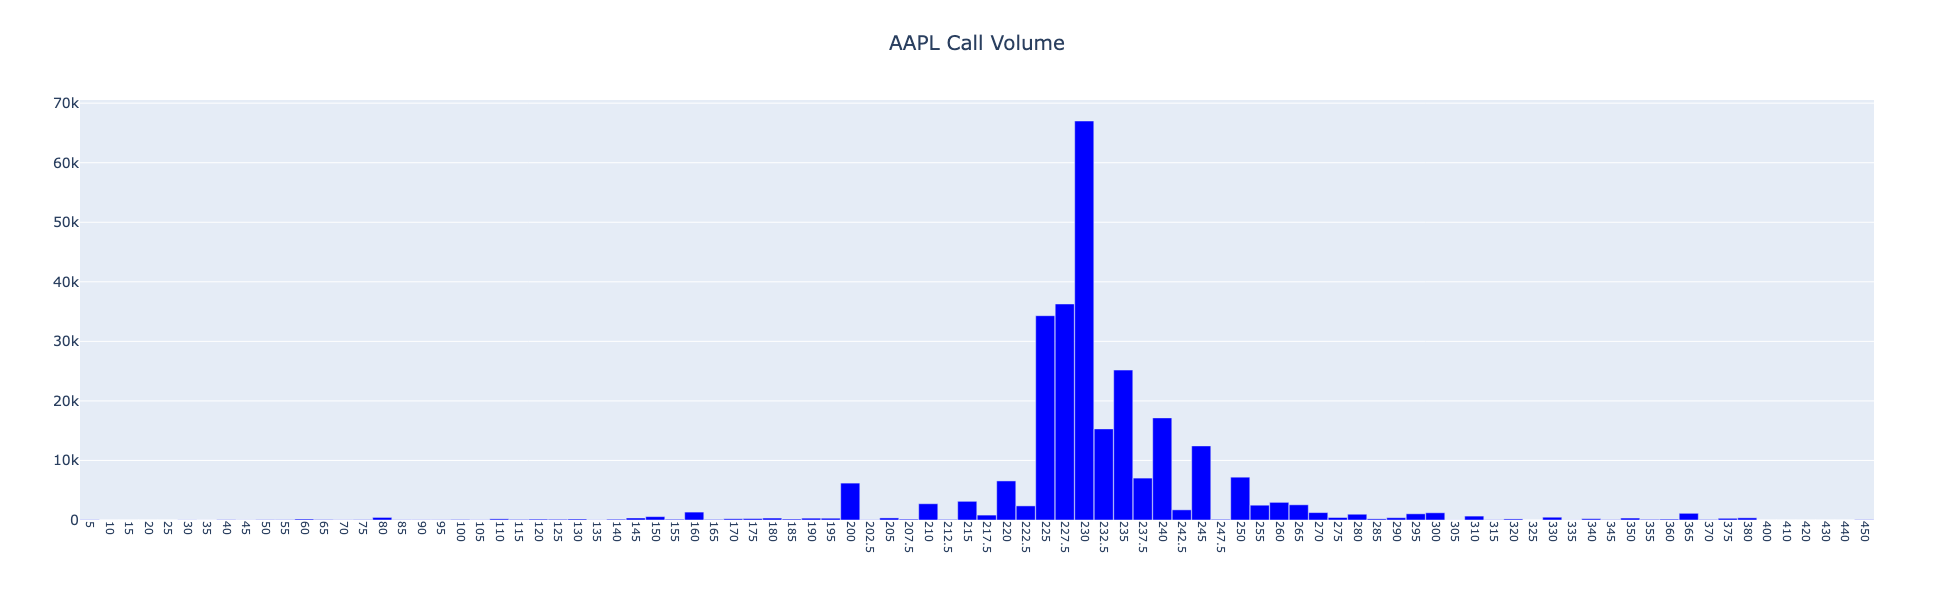

In [12]:
# Play this cell to display the choice
if data_selection.value is not None:
    generate_figure(data, data_selection.value).show()